# Strategy and Performance Management - Fall 2022 - Group Project
## H&M Personalized Fashion Recommendations
### Group 6: Thi Anh Ba Dang, Eduardo Garcia, MyThu Lam, Carla Weidner

---



## Group Project Specifications

**Project Presentation:**

*   Max 15 minute presentation
*   10 minutes of questions and discussions

**Project Criteria (40 pts total):**

1.   Relevance of the topic for a CEO ("Ask the right questions") - 5 pts
2.   Specific for one company - 5 pts
3.   Decision Relevant - 5 pts
4.   Data ("Extract, transform, and load the right data") - 5 pts
5.   Advanced Data Science ("Apply appropriate analytics techniques") - 10 pts
6.   Documentation / Code - 10 pts

**Presentation Criteria (20 pts total):**

1.   Framing of the topic - 1 pt
2.   Content / Explanations - 6 pts
3.   Structure - 1 pt
4.   Connectio to the audience - 1 pt
5.   Delivery - 1 pt
6.   Creativity - 1 pt
7.   Use of Time - 1 pt
8.   Use of Media - 2 pts
9.   Discussion / Interaction with class - 2 pts
10.  Overall Impression - 4 pts

**Project Inspiration - Project 2: EMMA**

Develop a recommendation engine to display cross-sell options on our webshop.

Background: Emma was founded as mattress e-commerce, but we are committed to become the No1 sleep brand in the world. To achieve that, we want to offer and sell more sleep-related products beyond mattresses. Therefore we need to be able to recommend the right additional product to our customers at the point of purchase.

Challenge: You will be provided with a list of orders by customers who have placed multiple orders in a short time frame, as well as anonymized customer data. You are then challenged, to develop a recommendation engine that is suited to suggest additional products when a potential customer has placed a product in his cart.


---


## Kaggle Project Description

**Project Source - Kaggle Competition**

https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview



**Description (from Kaggle website)**

H&M Group is a family of brands and businesses with 53 online markets and approximately 4,850 stores. Our online store offers shoppers an extensive selection of products to browse through. But with too many choices, customers might not quickly find what interests them or what they are looking for, and ultimately, they might not make a purchase. To enhance the shopping experience, product recommendations are key. More importantly, helping customers make the right choices also has a positive implications for sustainability, as it reduces returns, and thereby minimizes emissions from transportation.

In this competition, H&M Group invites you to develop product recommendations based on data from previous transactions, as well as from customer and product meta data. The available meta data spans from simple data, such as garment type and customer age, to text data from product descriptions, to image data from garment images.

There are no preconceptions on what information that may be useful – that is for you to find out. If you want to investigate a categorical data type algorithm, or dive into NLP and image processing deep learning, that is up to you.



**Evaluation**

Submissions are evaluated according to the Mean Average Precision @ 12 (MAP@12):

$MAP@12=\frac{1}{U} \sum_{u=1}^{U} \frac{1}{min(m,12)} \sum_{k=1}^{min(n,12)} P(k) × rel(k)$

where 𝑈 is the number of customers, 𝑃(𝑘) is the precision at cutoff 𝑘, 𝑛 is the number predictions per customer, 𝑚 is the number of ground truth values per customer, and 𝑟𝑒𝑙(𝑘) is an indicator function equaling 1 if the item at rank 𝑘 is a relevant (correct) label, zero otherwise.

Notes:

You will be making purchase predictions for all customer_id values provided, regardless of whether these customers made purchases in the training data.
Customer that did not make any purchase during test period are excluded from the scoring.
There is never a penalty for using the full 12 predictions for a customer that ordered fewer than 12 items; thus, it's advantageous to make 12 predictions for each customer.

**Dataset Description**

For this challenge you are given the purchase history of customers across time, along with supporting metadata. Your challenge is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends. Customer who did not make any purchase during that time are excluded from the scoring.

**Q&A from Host**

https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/307001

# Exploratory Data Analysis

## Importing Data from Kaggle to Colab

In [1]:
# upload API's key JSON file to 

from google.colab import files
files.upload()

{}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
!unzip -qq h-and-m-personalized-fashion-recommendations.zip

unzip:  cannot find or open h-and-m-personalized-fashion-recommendations.zip, h-and-m-personalized-fashion-recommendations.zip.zip or h-and-m-personalized-fashion-recommendations.zip.ZIP.


In [8]:
import shutil
shutil.rmtree('images')

FileNotFoundError: ignored

There are five (5) different sets of data:


*   images/ - a folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the article_id; note, not all article_id values have a corresponding image.
*   articles.csv - detailed metadata for each article_id available for purchase
*   customers.csv - metadata for each customer_id in dataset
*   sample_submission.csv - a sample submission file in the correct format
*   transactions_train.csv - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. 

Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.

## Import and Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import label encoder
from sklearn import preprocessing

# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

## articles.csv
detailed metadata for each article_id available for purchase

This dataset contains 25 features and 105,542 records.

In [4]:
# Load the data

df_articles = pd.read_csv('dataset/articles.csv')

#View basic info about data and data itself
df_articles.info()
df_articles.describe()
df_articles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


First, we need to check if there are duplicate rows and null/NaN values in the dataset.

In [5]:
# find duplicate rows
df_articles.duplicated().sum()

0

This means that all rows are unique.

In [6]:
# Find null values
df_articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

All features, except for detail_desc, do not have null values. detail_desc has 416 null values. We should determine if this feature is important and needs to be rectified or can be dropped.

For now, let's try to understand what each variable is.

In [7]:
# number of unique values in each feature
print('Number of Unique Values in Each Feature')
articles_columns = df_articles.columns
for col in df_articles.columns:
  print(col,len(df_articles[col].unique()))

Number of Unique Values in Each Feature
article_id 105542
product_code 47224
prod_name 45875
product_type_no 132
product_type_name 131
product_group_name 19
graphical_appearance_no 30
graphical_appearance_name 30
colour_group_code 50
colour_group_name 50
perceived_colour_value_id 8
perceived_colour_value_name 8
perceived_colour_master_id 20
perceived_colour_master_name 20
department_no 299
department_name 250
index_code 10
index_name 10
index_group_no 5
index_group_name 5
section_no 57
section_name 56
garment_group_no 21
garment_group_name 21
detail_desc 43405


**QUESTION:**

Why is there a mismatch in product code + product name, product type no + product type name, department number + department name, and section no + section name?

###Index Group

In [8]:
df_articles.groupby(['index_group_no', 'index_group_name']).count()['article_id']

index_group_no  index_group_name
1               Ladieswear          39737
2               Divided             15149
3               Menswear            12553
4               Baby/Children       34711
26              Sport                3392
Name: article_id, dtype: int64

### Index Code

In [9]:
df_articles.groupby(['index_code', 'index_name']).count()['article_id']

index_code  index_name                    
A           Ladieswear                        26001
B           Lingeries/Tights                   6775
C           Ladies Accessories                 6961
D           Divided                           15149
F           Menswear                          12553
G           Baby Sizes 50-98                   8875
H           Children Sizes 92-140             12007
I           Children Sizes 134-170             9214
J           Children Accessories, Swimwear     4615
S           Sport                              3392
Name: article_id, dtype: int64

In [10]:
pd.options.display.max_rows = None
df_articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

### Garment Group

In [11]:
df_articles.groupby(['garment_group_no', 'garment_group_name']).count()['article_id']

garment_group_no  garment_group_name           
1001              Unknown                           3873
1002              Jersey Basic                      8126
1003              Knitwear                          7490
1005              Jersey Fancy                     21445
1006              Woven/Jersey/Knitted mix Baby     1965
1007              Outdoor                           4501
1008              Dressed                            908
1009              Trousers                          6727
1010              Blouses                           5838
1011              Shirts                            2116
1012              Skirts                            1254
1013              Dresses Ladies                    4874
1014              Dresses/Skirts girls              1541
1016              Trousers Denim                    3100
1017              Under-, Nightwear                 7441
1018              Swimwear                          2787
1019              Accessories           

In [12]:
df_articles.groupby(['index_group_name', 'index_name', 'garment_group_name']).count()['article_id']

index_group_name  index_name                      garment_group_name           
Baby/Children     Baby Sizes 50-98                Accessories                      1054
                                                  Jersey Basic                     1147
                                                  Jersey Fancy                     2584
                                                  Knitwear                          397
                                                  Outdoor                           328
                                                  Shoes                             457
                                                  Socks and Tights                  465
                                                  Special Offers                     58
                                                  Under-, Nightwear                 420
                                                  Woven/Jersey/Knitted mix Baby    1965
                  Children Accessories, 

### Section

In [13]:
df_articles.groupby(['section_no', 'section_name']).count()['article_id']

section_no  section_name                  
2           H&M+                              2337
4           Ladies Other                         3
5           Ladies H&M Sport                  1894
6           Womens Casual                     2725
8           Mama                              2266
11          Womens Tailoring                  3376
14          Womens Premium                    1270
15          Womens Everyday Collection        7295
16          Womens Everyday Basics            1581
17          Ladies Other                         1
18          Womens Trend                      2622
19          Womens Jackets                     829
20          Contemporary Smart                1778
21          Contemporary Casual               1560
22          Men H&M Sport                      872
23          Men Suits & Tailoring             1428
24          Men Project                        298
25          Men Accessories                   1337
26          Men Underwear              

In [14]:
df_articles.groupby(['index_group_name', 'index_name','section_name']).count()['article_id']

index_group_name  index_name                      section_name                  
Baby/Children     Baby Sizes 50-98                Baby Boy                          1717
                                                  Baby Essentials & Complements     4932
                                                  Baby Girl                         1760
                                                  Kids & Baby Shoes                  457
                                                  Kids Local Relevance                 9
                  Children Accessories, Swimwear  Kids & Baby Shoes                 1685
                                                  Kids Accessories, Swimwear & D    1731
                                                  Kids Outerwear                    1199
                  Children Sizes 134-170          Boys Underwear & Basics            842
                                                  Girls Underwear & Basics          1485
                             

### Product Group Name

In [15]:
df_articles['product_group_name'].unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

### Department Name

In [16]:
df_articles['department_name'].unique()

array(['Jersey Basic', 'Clean Lingerie', 'Tights basic', 'Baby basics',
       'Casual Lingerie', 'Jersey', 'EQ & Special Collections',
       'Hair Accessories', 'Other items', 'Baby Nightwear',
       'Men Sport Woven', 'Men Sport Bottoms', 'Kids Boy Denim',
       'Shopbasket Socks', 'Socks', 'UW', 'Young Girl Jersey Basic',
       'Jacket Street', 'Belts', 'Divided Shoes', 'Swimwear',
       'Underwear Jersey', 'Basic 1', 'Tops Knitwear DS', 'Men Sport Acc',
       'Kids Boy Jersey Basic', 'Young Girl UW/NW', 'Shirt', 'Nightwear',
       'Trouser', 'Small Accessories', 'Sunglasses', 'Gloves/Hats',
       'Knit & Woven', 'Basics', 'Accessories', 'Jewellery',
       'Jersey Fancy DS', 'Trousers DS', 'Bags', 'Blazer S&T', 'Knitwear',
       'Woven bottoms', 'Shorts', 'Dresses DS', 'Expressive Lingerie',
       'Kids Girl UW/NW', 'Young Boy Jersey Basic', 'Kids Girl S&T',
       'Young Girl S&T', 'Shoes / Boots inactive from s5', 'Nursing',
       'Jersey Fancy', 'Shoes', 'Functional L

### Product Name

In [17]:
df_articles['prod_name'].unique()

array(['Strap top', 'Strap top (1)', 'OP T-shirt (Idro)', ...,
       'Cartwheel dress', 'CLAIRE HAIR CLAW', 'Lounge dress'],
      dtype=object)

From this exploratory analysis of the articles dataframe, we think the most valuable features for us right now are article_id and index_name.

## customers.csv

metadata for each customer_id in dataset

This dataset has seven (7) features and 1,371,980 records.

In [19]:
# Load the data

df_customers = pd.read_csv('dataset/customers.csv')

#View basic info about data and data itself
df_customers.info()
df_customers.describe()
df_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Check for duplicate records

In [20]:
# find duplicate rows
df_customers.duplicated().sum()

0

Check for NaN/Null values

In [21]:
# Find null values
df_customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

There are many null values in all of the fields except for customer_id and postal_code.

For now, let's try to understand what each variable is.

In [22]:
customers_columns = df_customers.columns
for col in df_customers.columns:
  print(col,len(df_customers[col].unique()))

customer_id 1371980
FN 2
Active 2
club_member_status 4
fashion_news_frequency 5
age 85
postal_code 352899


### FN

In [23]:
df_customers.groupby(['FN']).count()['customer_id']

FN
1.0    476930
Name: customer_id, dtype: int64

We should transform the data, by filling in the Nulls/NaN with 0.

In [24]:
df_customers['FN'] = df_customers['FN'].fillna(0)

okay, let's check again

In [25]:
df_customers.groupby(['FN']).count()['customer_id']

FN
0.0    895050
1.0    476930
Name: customer_id, dtype: int64

Text(0, 0.5, '# of Customers')

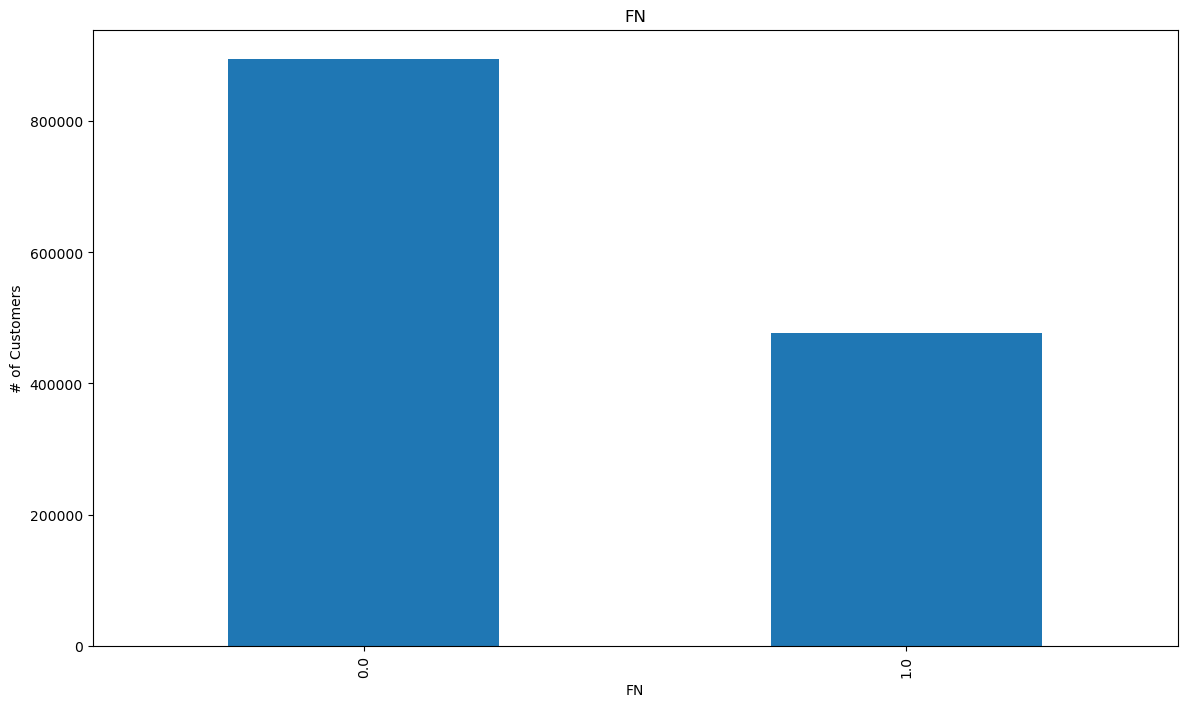

In [26]:
ax = df_customers['FN'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title='FN')
ax.set_xlabel('FN')
ax.set_ylabel("# of Customers")

### Active

In [27]:
df_customers.groupby(['Active']).count()['customer_id']

Active
1.0    464404
Name: customer_id, dtype: int64

We need to fill in the Nulls/NaN with 0.

In [28]:
df_customers['Active'] = df_customers['Active'].fillna(0)
df_customers.groupby(['Active']).count()['customer_id']

Active
0.0    907576
1.0    464404
Name: customer_id, dtype: int64

Text(0, 0.5, '# of Customers')

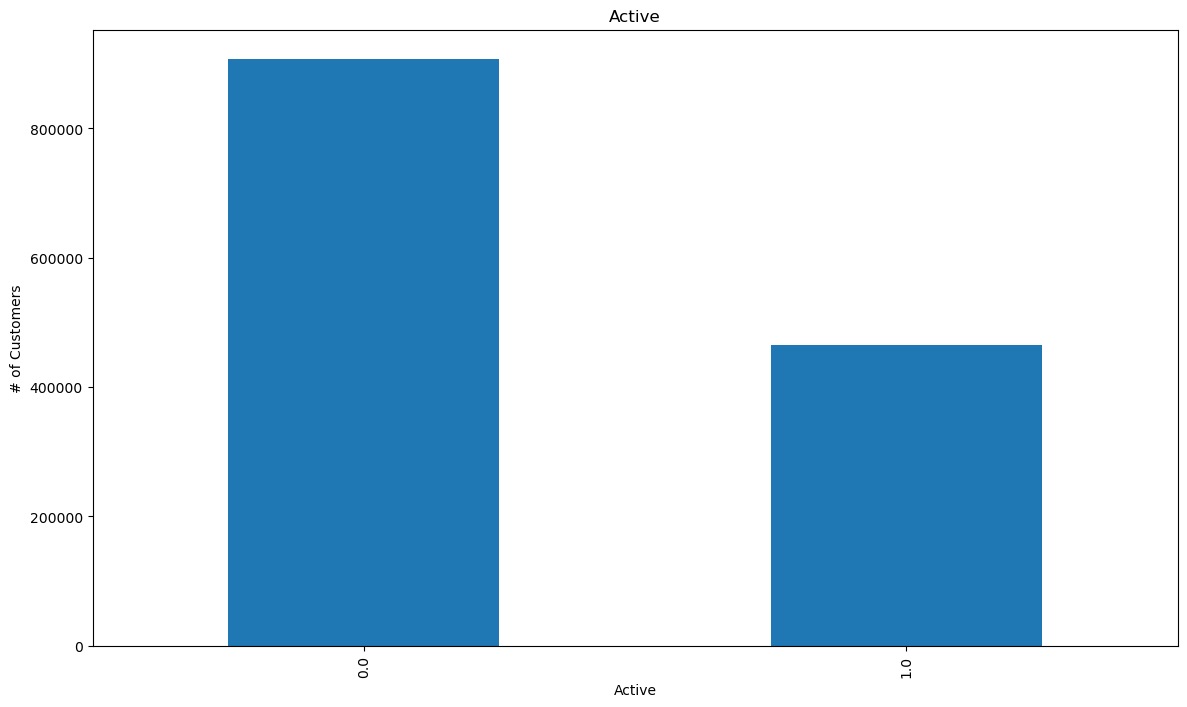

In [29]:
ax = df_customers['Active'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title='Active')
ax.set_xlabel('Active')
ax.set_ylabel("# of Customers")

### Club Member Status

In [30]:
df_customers.groupby(['club_member_status']).count()['customer_id']

club_member_status
ACTIVE        1272491
LEFT CLUB         467
PRE-CREATE      92960
Name: customer_id, dtype: int64

In [31]:
df_customers['club_member_status'].isnull().sum()

6062

We need to replace Null/NaN values with 'NONE'.

In [32]:
df_customers['club_member_status'] = df_customers['club_member_status'].fillna('NONE')
df_customers.groupby(['club_member_status']).count()['customer_id']

club_member_status
ACTIVE        1272491
LEFT CLUB         467
NONE             6062
PRE-CREATE      92960
Name: customer_id, dtype: int64

Text(0, 0.5, '# of Customers')

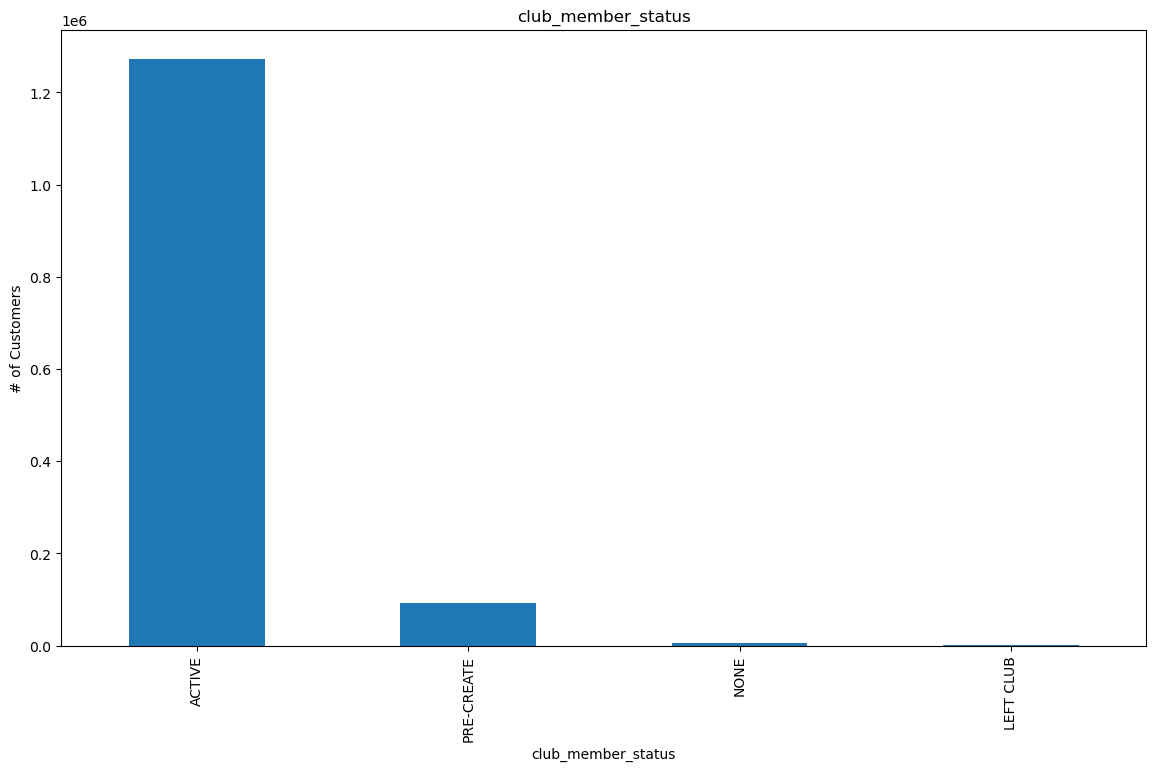

In [33]:
ax = df_customers['club_member_status'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title='club_member_status')
ax.set_xlabel('club_member_status')
ax.set_ylabel("# of Customers")

### Fashion News Frequency

In [34]:
df_customers.groupby(['fashion_news_frequency']).count()['customer_id']

fashion_news_frequency
Monthly         842
NONE         877711
None              2
Regularly    477416
Name: customer_id, dtype: int64

In [35]:
df_customers['fashion_news_frequency'] = df_customers['fashion_news_frequency'].fillna('NONE')
df_customers['fashion_news_frequency'] = df_customers['fashion_news_frequency'].replace('None', 'NONE')
df_customers.groupby(['fashion_news_frequency']).count()['customer_id']

fashion_news_frequency
Monthly         842
NONE         893722
Regularly    477416
Name: customer_id, dtype: int64

Text(0, 0.5, '# of Customers')

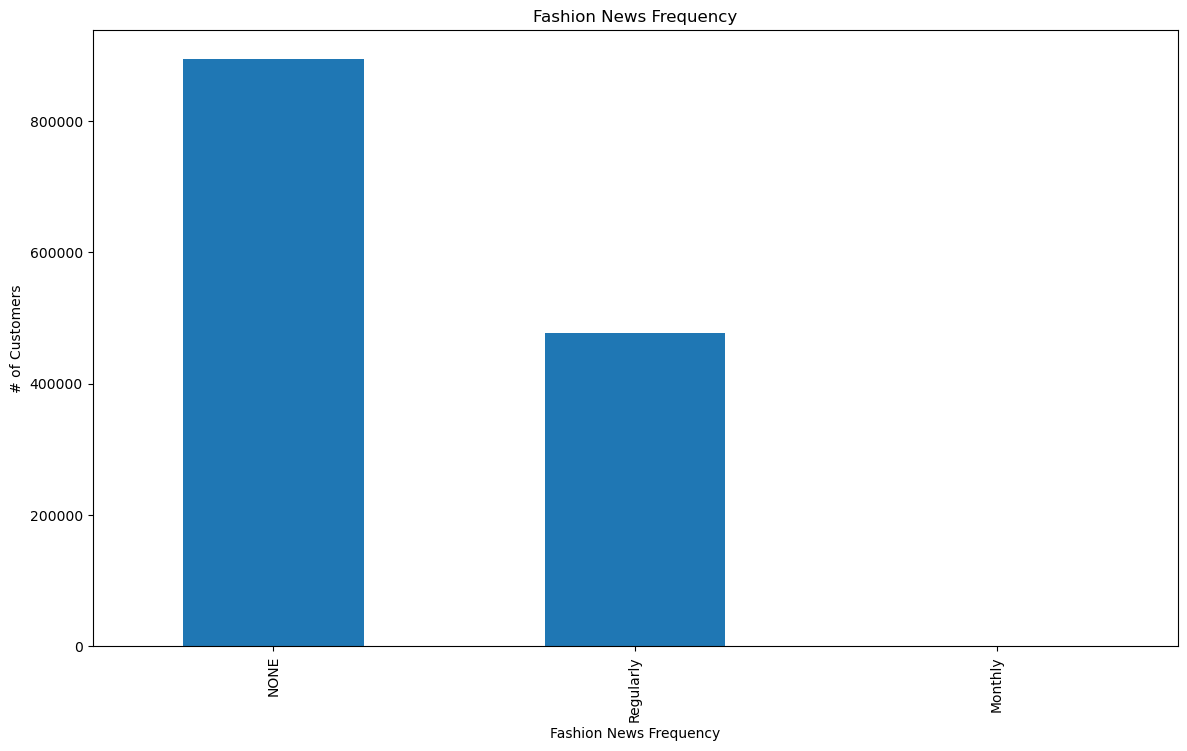

In [36]:
ax = df_customers['fashion_news_frequency'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Fashion News Frequency")
ax.set_xlabel("Fashion News Frequency")
ax.set_ylabel("# of Customers")

### Age

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

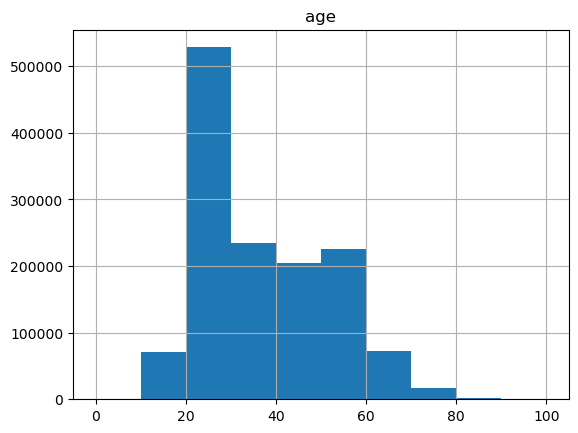

In [37]:
df_customers.hist(column='age', bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

Majority of customers are aged 20 to 30.

## transaction_train.csv

the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. 

This dataset has five (5) features and 31,788,324 records.

In [39]:
# Load the data

df_transaction = pd.read_csv('dataset/transactions_train.csv')

#View basic info about data and data itself
df_transaction.info()
df_transaction.describe()
df_transaction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


### Sales Channel ID

1 - In Store Purchase

2 - Online Purchase

In [40]:
df_transaction.groupby(['sales_channel_id']).count()['article_id']

sales_channel_id
1     9408462
2    22379862
Name: article_id, dtype: int64

In [41]:
print('In-store purchases make up ', 9408462/(9408462+22379862)*100 , '%')
print('Online purchases make up ', 22379862/(9408462+22379862)*100 , '%')

In-store purchases make up  29.59722569834132 %
Online purchases make up  70.4027743016587 %


### Article Prices

In [42]:
# copy the transaction df
df_articleprice = df_transaction[['article_id','sales_channel_id','price']].copy()
df_articleprice.head()

# check to see shape and other info
# df_articleprice.info()

df_articleprice = df_articleprice.drop_duplicates()

# check to see shape and other info
# df_articleprice.info()

df_articleprice.head()

,article_id,sales_channel_id,price
0,663713001,2,0.050831
1,541518023,2,0.030492
2,505221004,2,0.015237
3,685687003,2,0.016932
4,685687004,2,0.016932


In [43]:
df_articleprice2 = df_articleprice.groupby(['article_id','sales_channel_id']).mean()[['price']].reset_index()
df_articleprice2.rename(columns = {'price':'mean_price'}, inplace = True)
df_articleprice2['min_price'] = df_articleprice.groupby(['article_id','sales_channel_id']).min().sort_values(by='article_id', ascending=True)['price'].tolist()
df_articleprice2['max_price'] = df_articleprice.groupby(['article_id','sales_channel_id']).max().sort_values(by='article_id', ascending=True)['price'].tolist()

df_instore_price = df_articleprice2[df_articleprice2.sales_channel_id ==1]
df_online_price = df_articleprice2[df_articleprice2.sales_channel_id ==2]

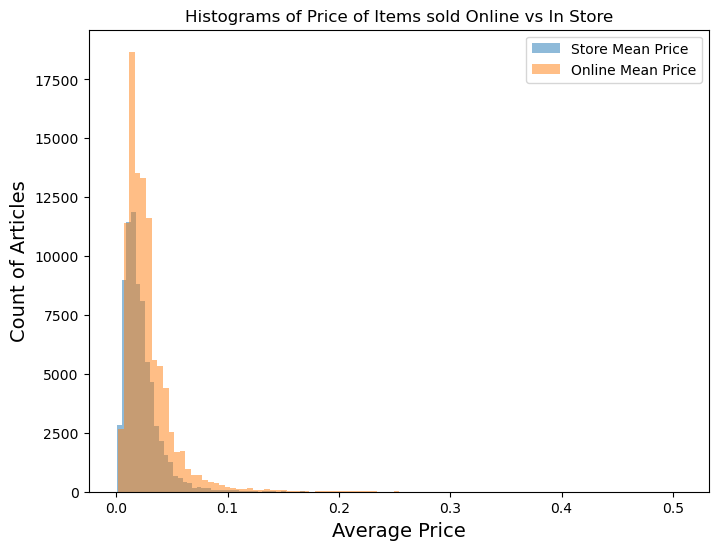

In [44]:
plt.figure(figsize=(8,6))
plt.hist(df_instore_price['mean_price'], bins=100, alpha=0.5, label="Store Mean Price")
plt.hist(df_online_price['mean_price'], bins=100, alpha=0.5, label="Online Mean Price")

plt.xlabel("Average Price", size=14)
plt.ylabel("Count of Articles", size=14)
plt.title("Histograms of Price of Items sold Online vs In Store")
plt.legend(loc='upper right')
# plt.savefig("overlapping_histograms_with_matplotlib_Python.png")

Items sold online were generally more expensive than items sold in-store.

### Time Series Plot

In [45]:
df_num_trans = df_transaction.groupby('t_dat').count()[['article_id']].reset_index()
df_num_trans.rename(columns = {'article_id':'num_transaction'}, inplace = True)
df_num_trans['t_dat'] = df_num_trans['t_dat'].astype("datetime64")

df_num_trans.head()
df_num_trans.info()
df_num_trans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   t_dat            734 non-null    datetime64[ns]
 1   num_transaction  734 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.6 KB


,num_transaction
count,734.000000
mean,43308.343324
std,17075.025144
min,12760.000000
25%,33935.750000
50%,39515.500000
75%,47447.500000
max,198622.000000


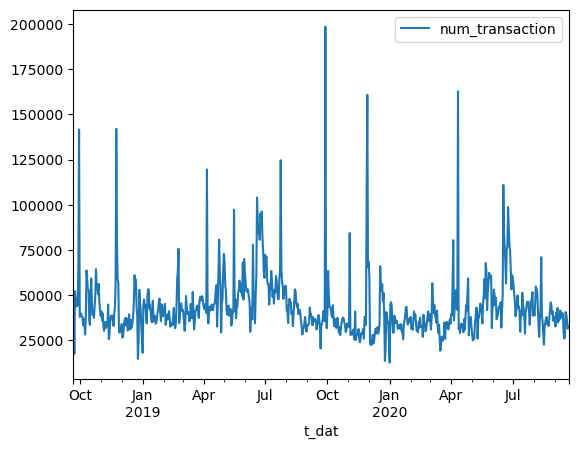

In [46]:
# plot = df_num_trans["num_transaction"].plot()
df_num_trans.plot( 't_dat' , 'num_transaction' )
plt.show()

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


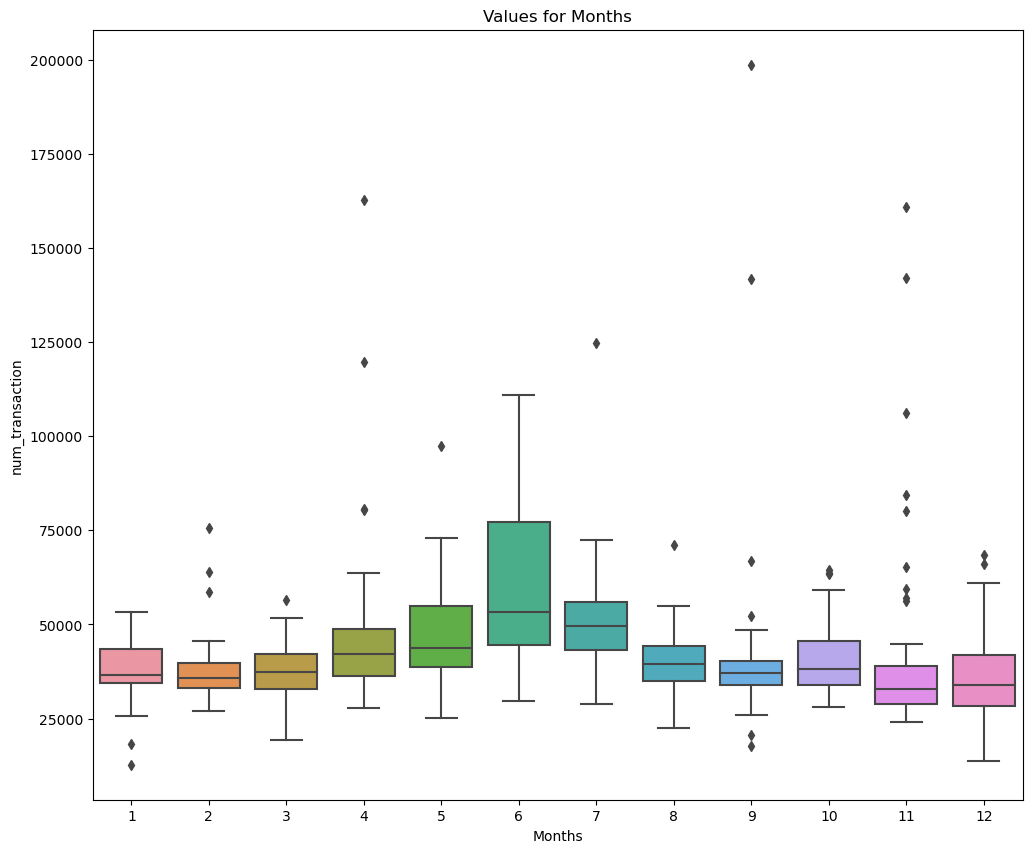

In [47]:
# Code from Deep Learning Lectures

import seaborn as sns
reindexed_df = df_num_trans.copy()
reindexed_df = reindexed_df.set_index("t_dat")

plt.close()
#It is sometimes good to make sure the canvas prior is rendered and plot is closed.

fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(reindexed_df.index.month, reindexed_df["num_transaction"], ax=ax)#, width=20)
plt.title("Values for Months")
plt.xlabel("Months")
plt.show()